In [9]:
import pandas as pd
df = pd.read_csv("events/filtered_events_20251118_111429.csv")
df

,x_bin,y_bin,batch_start_t
0,99,18,10200047
1,99,19,10200047
2,80,18,10210000
3,80,19,10210000
4,80,20,10210000
...,...,...,...
15787,99,20,18380000
15788,99,21,18380000
15789,99,22,18380000
15790,99,24,18380000


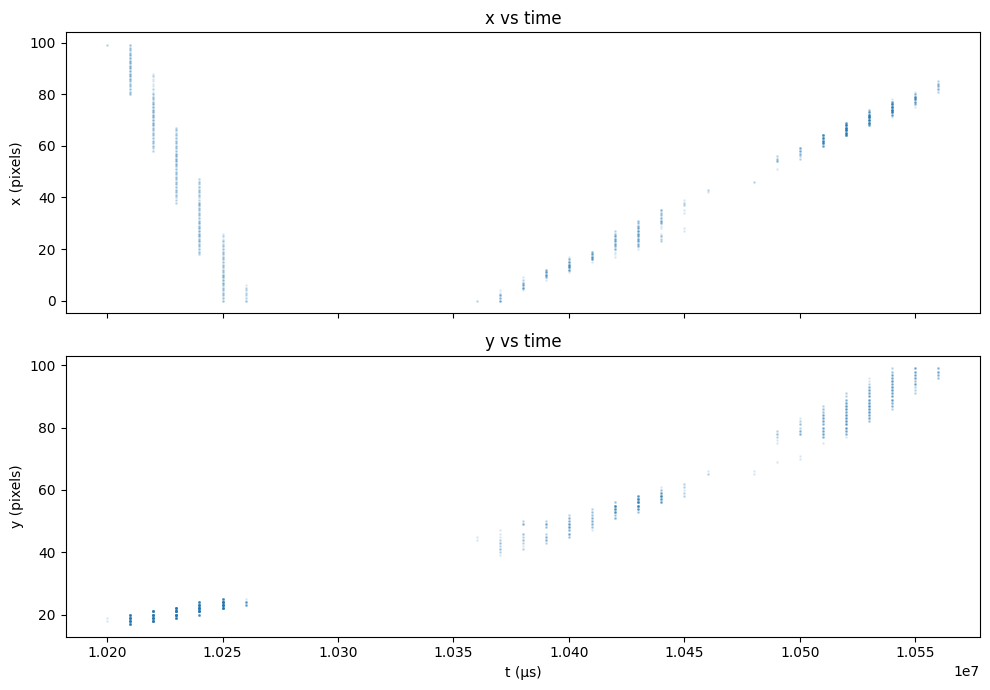

In [ ]:
import matplotlib.pyplot as plt

t = df["batch_start_t"].to_numpy()
x = df["x_bin"].to_numpy()
y = df["y_bin"].to_numpy()

time_a = 0.8e7  # start time in µs
time_b = 1.1e7  # end time in µs
mask = (t >= time_a) & (t <= time_b)
t = t[mask]
x = x[mask]
y = y[mask]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7), sharex=True)

ax1.scatter(t, x, s=1, rasterized=True)
ax1.set_ylabel("x (pixels)")
ax1.set_title("x vs time")

ax2.scatter(t, y, s=1, rasterized=True)
ax2.set_xlabel("t (µs)")
ax2.set_ylabel("y (pixels)")
ax2.set_title("y vs time")

plt.tight_layout()
plt.show()

In [23]:
import plotly.graph_objects as go
import numpy as np

# ---- EXTRACT ARRAYS ----
t = df["batch_start_t"].to_numpy()
x = df["x_bin"].to_numpy()
y = df["y_bin"].to_numpy()

# ---- TIME SLICE ----
time_a = 0.8e7
time_b = 1.1e7
mask = (t >= time_a) & (t <= time_b)

t = t[mask]
x = x[mask]
y = y[mask]

# ---- BUILD INTERACTIVE 3D FIG ----
fig = go.Figure(data=[
    go.Scatter3d(
        x=x,
        y=y,
        z=t,
        mode='markers',
        marker=dict(
            size=2,
            color=t,        # color by time
            colorscale='Viridis',
            opacity=0.8
        )
    )
])

fig.update_layout(
    title="Interactive 3D Bullet Trajectory (x, y, t)",
    scene=dict(
        xaxis_title="x_bin (virtual pixels)",
        yaxis_title="y_bin (virtual pixels)",
        zaxis_title="time (µs)"
    ),
    width=900,
    height=700
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed